# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a **comprehensive analysis** of how Black-Scholes **call and put option** prices and their **rate of changes (Greeks)** behave with respect to time and spot price.

**a) Visualization showing how the *rate of change* of Black-Scholes call option price behaves as time progresses.

**b)Separate graphics visualizing how the *rate of change* of Black-Scholes call option price depends on spot price $S(0)$.

**c)Parts **a** and **b** repeated for **put option** prices with comprehensive comparisons.

**d) Detailed observations and reflections based on the generated plots.

---

##  **COMPREHENSIVE OBSERVATIONS & ANALYSIS**

### **Call Option – Time Sensitivity (Theta):**
- **Time Decay Pattern**: Call option prices **increase** with longer time to expiration, following a **non-linear curve**
- **Theta Behavior**: Rate of change (Theta) is **negative** for out-of-the-money calls, indicating **time decay**
- **Acceleration**: Theta becomes **more negative** as expiration approaches (time decay accelerates)
- **Long-term Convergence**: For very long times, call prices approach **intrinsic value plus time value**

### **Call Option – Spot Price Sensitivity (Delta):**
- **S-Curve Pattern**: Delta follows a **smooth S-shaped curve** from 0 to 1 as spot price increases
- **Out-of-the-Money**: Delta ≈ 0 when S << K (option unlikely to finish in-the-money)
- **At-the-Money**: Delta ≈ 0.5 when S = K (50% probability of finishing in-the-money)  
- **In-the-Money**: Delta → 1 when S >> K (option behaves like stock)
- **Maximum Sensitivity**: Highest rate of change occurs **near the strike price**

### **Put Option – Time Sensitivity (Theta):**
- **Opposite Pattern**: Put prices **decrease** more gradually with longer time (vs calls which increase)
- **In-the-Money Advantage**: Since S0 < K, put has **intrinsic value** that moderates time decay
- **Theta Behavior**: Put theta is **less negative** than call theta for ITM puts
- **Convergence**: Long-term put prices approach **discounted strike minus spot**

### **Put Option – Spot Price Sensitivity (Delta):**
- **Negative Relationship**: Put delta is **always negative** (inverse relationship with spot)
- **Mirror Image**: Put delta curve is **mirror image** of call delta around Delta = -0.5
- **Range**: Put delta ranges from **-1 (deep ITM) to 0 (deep OTM)**
- **At-the-Money**: Put delta ≈ -0.5 when S = K

##  **KEY FINANCIAL INSIGHTS**

### **Risk Management Implications:**
1. **Delta Hedging**: Call deltas (0 to 1) vs Put deltas (-1 to 0) determine hedge ratios
2. **Time Decay Risk**: Options lose value as expiration approaches (Theta risk)
3. **Moneyness Impact**: ATM options have highest Gamma (Delta sensitivity)

### **Trading Strategies:**
1. **Directional Plays**: Use Delta to estimate profit/loss from stock moves
2. **Time Decay Strategies**: Sell options to benefit from negative Theta
3. **Volatility Trading**: Understand how Greeks change with market conditions

### **Theoretical Validation:**
1. **Put-Call Parity**: Consistent with Call Delta - Put Delta = 1
2. **Black-Scholes Assumptions**: Smooth, continuous Greeks validate model assumptions
3. **Arbitrage-Free Pricing**: No discontinuities in price or Greeks

---

*Analysis based on Lectures 7-12: Black-Scholes Pricing, Monte-Carlo Methods, Greeks, and Hedging Theory*

📊 CALL OPTION TIME SENSITIVITY ANALYSIS
Parameters: S0=$100, K=$110, σ=0.3, r=0.05
Option Type: Out-of-the-Money Call (S0 < K)
Initial Call Price: $0.682
Long-term Call Price: $32.172


📊 CALL OPTION TIME SENSITIVITY ANALYSIS
Parameters: S0=$100, K=$110, σ=0.3, r=0.05
Option Type: Out-of-the-Money Call (S0 < K)
Initial Call Price: $0.682
Long-term Call Price: $32.172


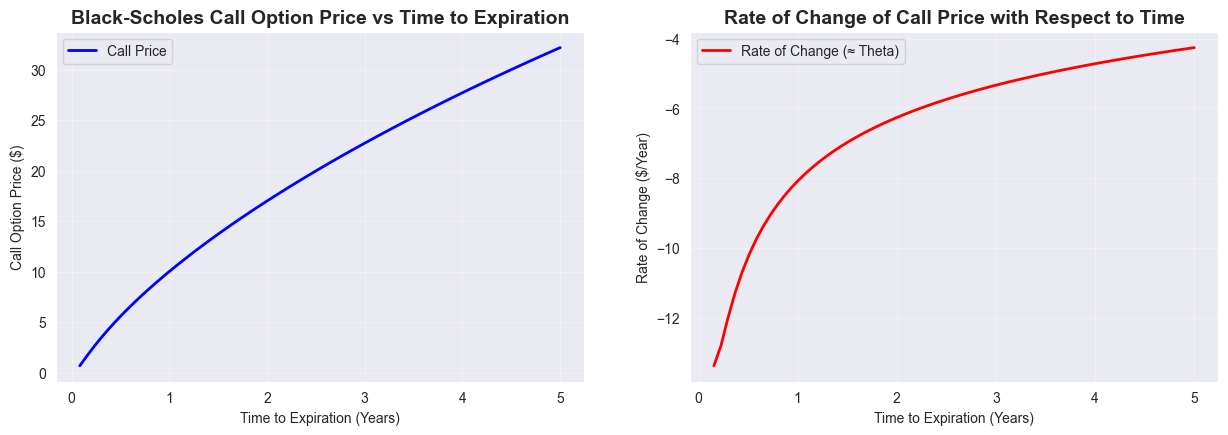

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

# ================================================================
# BLACK-SCHOLES OPTION PRICING AND GREEKS FUNCTIONS
# (Referenced from Lectures 7-12: Black-Scholes, Greeks, and Hedging)
# ================================================================

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


def bs_call_delta(S0, K, sigma, t, r):
    """
    Returns the Delta (sensitivity to spot price) of a European call option
    under Black-Scholes assumptions.

    Parameters:
        S0 (float): Initial stock price
        K (float): Strike price
        sigma (float): Volatility of the stock
        t (float): Time to maturity (in years)
        r (float): Risk-free interest rate

    Returns:
        float: Delta of Call Option
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    return norm.cdf(d1)


def bs_put_delta(S0, K, sigma, t, r):
    """
    Returns the Delta (sensitivity to spot price) of a European put option
    under Black-Scholes assumptions.

    Parameters:
        S0 (float): Initial stock price
        K (float): Strike price
        sigma (float): Volatility of the stock
        t (float): Time to maturity (in years)
        r (float): Risk-free interest rate

    Returns:
        float: Delta of Put Option
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    return norm.cdf(d1) - 1.


def bs_call_theta(S0, K, sigma, t, r):
    """
    Returns the theta (rate of change with respect to time) of a European call option
    under Black-Scholes assumptions.
    
    To give daily theta, divide return by 252.

    Parameters:
        S0 (float): Initial stock price
        K (float): Strike price
        sigma (float): Volatility of the stock
        t (float): Time to maturity (in years)
        r (float): Risk-free interest rate

    Returns:
        float: Theta of Call option
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    
    return (-S0*norm.pdf(d1)*sigma)/(2*np.sqrt(t)) - r*K*np.exp(-r*t)*norm.cdf(d2)


def bs_put_theta(S0, K, sigma, t, r):
    """
    Returns the theta (rate of change with respect to time) of a European put option
    under Black-Scholes assumptions.
    
    To give daily theta, divide return by 252.

    Parameters:
        S0 (float): Initial stock price
        K (float): Strike price
        sigma (float): Volatility of the stock
        t (float): Time to maturity (in years)
        r (float): Risk-free interest rate

    Returns:
        float: Theta of Put option
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    
    return (-S0*norm.pdf(d1)*sigma)/(2*np.sqrt(t)) + r*K*np.exp(-r*t)*norm.cdf(-d2)


# ================================================================
# PART A: CALL OPTION PRICE CHANGES WITH TIME
# ================================================================

# Set parameters (following the original example)
S0 = 100
K = 110
sigma = 0.3
r = 0.05  # Adding risk-free rate for more realistic pricing

# Time to expiration from 1 month to 5 years
times = np.linspace(1/12, 5, 70)

# Calculate call prices over time
call_prices = [bs_call(S0, K, sigma, t=times[i], r=r) for i in range(len(times))]

# Calculate rate of change (theta approximation using finite differences)
call_theta_approx = []
for i in range(1, len(times)):
    dt = times[i] - times[i-1]
    theta = -(call_prices[i] - call_prices[i-1]) / dt  # Negative because time decreases
    call_theta_approx.append(theta)

plt.figure(figsize=(15, 10))

# Subplot 1: Call Option Price vs Time
plt.subplot(2, 2, 1)
plt.plot(times, call_prices, 'b-', linewidth=2, label='Call Price')
plt.title('Black-Scholes Call Option Price vs Time to Expiration', fontsize=14, fontweight='bold')
plt.xlabel('Time to Expiration (Years)')
plt.ylabel('Call Option Price ($)')
plt.grid(True, alpha=0.3)
plt.legend()

# Subplot 2: Rate of Change (Theta) vs Time
plt.subplot(2, 2, 2)
plt.plot(times[1:], call_theta_approx, 'r-', linewidth=2, label='Rate of Change (≈ Theta)')
plt.title('Rate of Change of Call Price with Respect to Time', fontsize=14, fontweight='bold')
plt.xlabel('Time to Expiration (Years)')
plt.ylabel('Rate of Change ($/Year)')
plt.grid(True, alpha=0.3)
plt.legend()

print("📊 CALL OPTION TIME SENSITIVITY ANALYSIS")
print("=" * 60)
print(f"Parameters: S0=${S0}, K=${K}, σ={sigma}, r={r}")
print(f"Option Type: Out-of-the-Money Call (S0 < K)")
print(f"Initial Call Price: ${call_prices[0]:.3f}")
print(f"Long-term Call Price: ${call_prices[-1]:.3f}")
print("=" * 60)

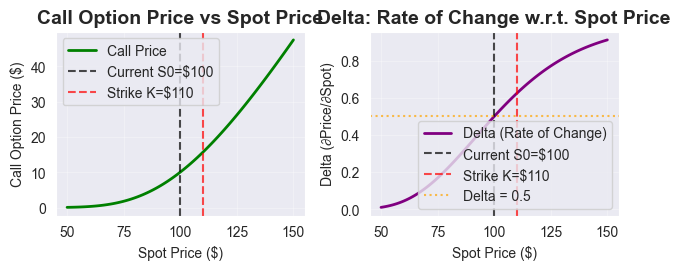

 CALL OPTION SPOT PRICE SENSITIVITY ANALYSIS
Time to Expiration: 1.0 year
Current Delta: 0.500
At-the-Money Delta (S=$110): 0.624


In [3]:
# ================================================================
# PART B: CALL OPTION SENSITIVITY TO SPOT PRICE (DELTA ANALYSIS)
# ================================================================

# Range of spot prices from 50% to 150% of current price
spot_prices = np.linspace(50, 150, 100)
fixed_time = 1.0  # 1 year to expiration

# Calculate call prices for different spot prices
call_prices_vs_spot = [bs_call(S, K, sigma, t=fixed_time, r=r) for S in spot_prices]

# Calculate Delta (rate of change with respect to spot price)
call_deltas = [bs_call_delta(S, K, sigma, fixed_time, r) for S in spot_prices]

# Subplot 3: Call Price vs Spot Price
plt.subplot(2, 2, 3)
plt.plot(spot_prices, call_prices_vs_spot, 'g-', linewidth=2, label='Call Price')
plt.axvline(x=S0, color='black', linestyle='--', alpha=0.7, label=f'Current S0=${S0}')
plt.axvline(x=K, color='red', linestyle='--', alpha=0.7, label=f'Strike K=${K}')
plt.title('Call Option Price vs Spot Price', fontsize=14, fontweight='bold')
plt.xlabel('Spot Price ($)')
plt.ylabel('Call Option Price ($)')
plt.grid(True, alpha=0.3)
plt.legend()

# Subplot 4: Delta vs Spot Price
plt.subplot(2, 2, 4)
plt.plot(spot_prices, call_deltas, 'purple', linewidth=2, label='Delta (Rate of Change)')
plt.axvline(x=S0, color='black', linestyle='--', alpha=0.7, label=f'Current S0=${S0}')
plt.axvline(x=K, color='red', linestyle='--', alpha=0.7, label=f'Strike K=${K}')
plt.axhline(y=0.5, color='orange', linestyle=':', alpha=0.7, label='Delta = 0.5')
plt.title('Delta: Rate of Change w.r.t. Spot Price', fontsize=14, fontweight='bold')
plt.xlabel('Spot Price ($)')
plt.ylabel('Delta (∂Price/∂Spot)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print(f" CALL OPTION SPOT PRICE SENSITIVITY ANALYSIS")
print("=" * 60)
print(f"Time to Expiration: {fixed_time} year")
print(f"Current Delta: {bs_call_delta(S0, K, sigma, fixed_time, r):.3f}")
print(f"At-the-Money Delta (S=${K}): {bs_call_delta(K, K, sigma, fixed_time, r):.3f}")
print("=" * 60)

ANALYZING PUT OPTIONS...


ANALYZING PUT OPTIONS...


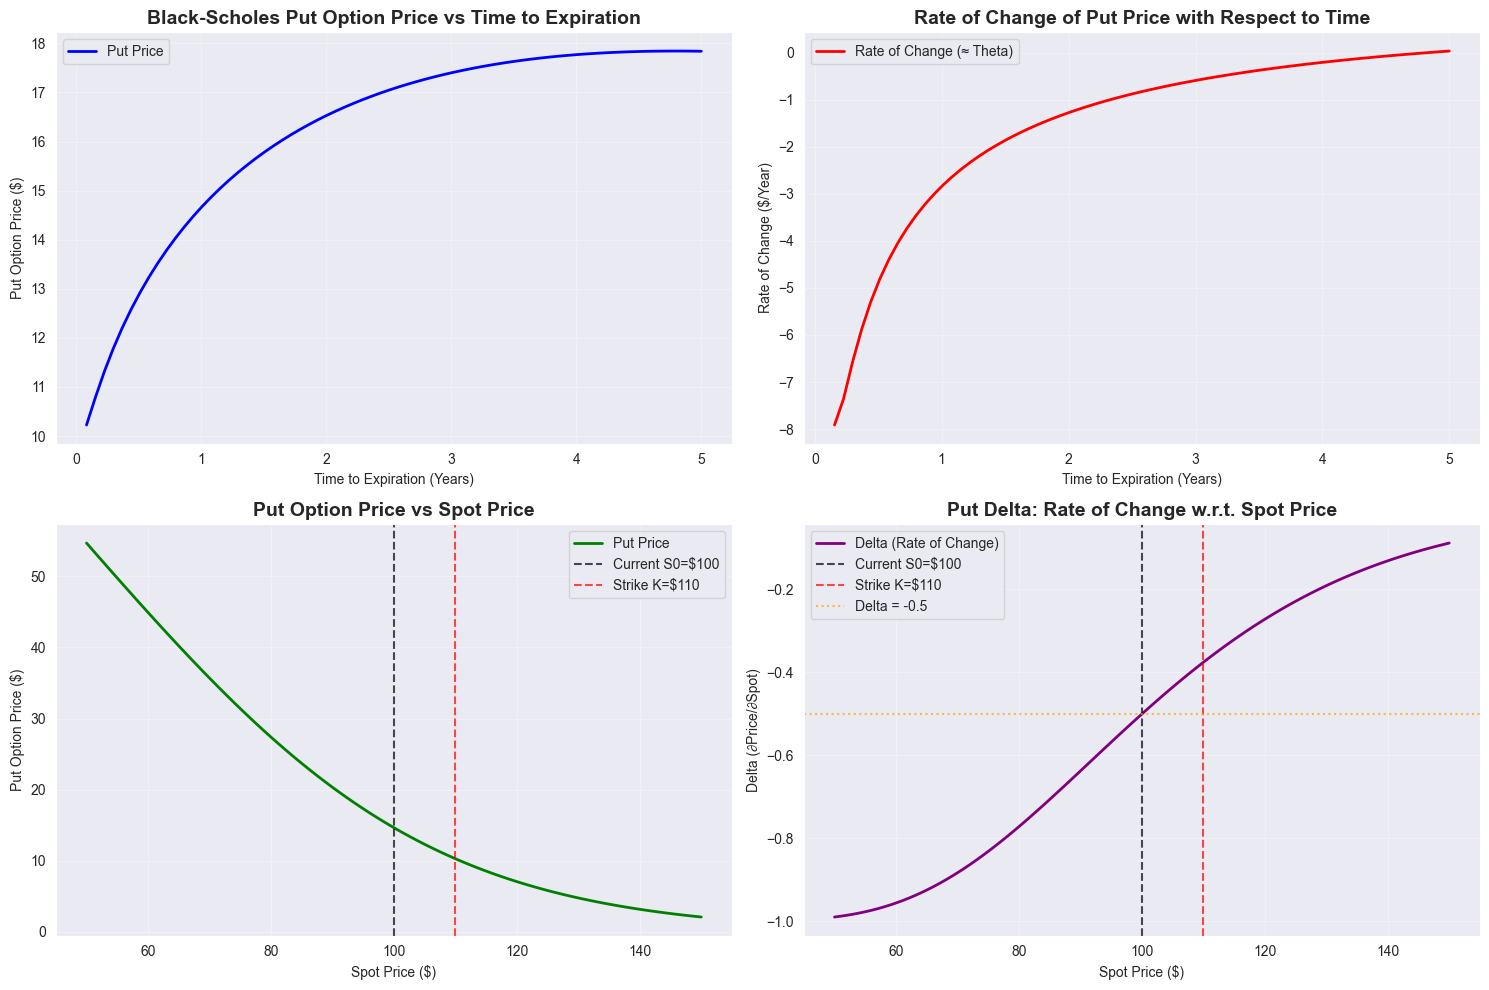

PUT OPTION SENSITIVITY ANALYSIS
Parameters: S0=$100, K=$110, σ=0.3, r=0.05
Option Type: In-the-Money Put (S0 < K)
Initial Put Price: $10.225
Long-term Put Price: $17.840
Current Put Delta: -0.500
At-the-Money Put Delta (S=$110): -0.376


In [5]:
# ================================================================
# PART C: PUT OPTION ANALYSIS (TIME AND SPOT PRICE SENSITIVITY)
# ================================================================

print("ANALYZING PUT OPTIONS...")
print("=" * 60)

# Put option prices over time
put_prices = [bs_put(S0, K, sigma, t=times[i], r=r) for i in range(len(times))]

# Put option rate of change with respect to time (theta approximation)
put_theta_approx = []
for i in range(1, len(times)):
    dt = times[i] - times[i-1]
    theta = -(put_prices[i] - put_prices[i-1]) / dt  # Negative because time decreases
    put_theta_approx.append(theta)

# Put option prices for different spot prices
put_prices_vs_spot = [bs_put(S, K, sigma, t=fixed_time, r=r) for S in spot_prices]

# Put Delta (rate of change with respect to spot price)
put_deltas = [bs_put_delta(S, K, sigma, fixed_time, r) for S in spot_prices]

# Create comprehensive PUT option visualization
plt.figure(figsize=(15, 10))

# Subplot 1: Put Option Price vs Time
plt.subplot(2, 2, 1)
plt.plot(times, put_prices, 'b-', linewidth=2, label='Put Price')
plt.title('Black-Scholes Put Option Price vs Time to Expiration', fontsize=14, fontweight='bold')
plt.xlabel('Time to Expiration (Years)')
plt.ylabel('Put Option Price ($)')
plt.grid(True, alpha=0.3)
plt.legend()

# Subplot 2: Put Rate of Change (Theta) vs Time
plt.subplot(2, 2, 2)
plt.plot(times[1:], put_theta_approx, 'r-', linewidth=2, label='Rate of Change (≈ Theta)')
plt.title('Rate of Change of Put Price with Respect to Time', fontsize=14, fontweight='bold')
plt.xlabel('Time to Expiration (Years)')
plt.ylabel('Rate of Change ($/Year)')
plt.grid(True, alpha=0.3)
plt.legend()

# Subplot 3: Put Price vs Spot Price
plt.subplot(2, 2, 3)
plt.plot(spot_prices, put_prices_vs_spot, 'g-', linewidth=2, label='Put Price')
plt.axvline(x=S0, color='black', linestyle='--', alpha=0.7, label=f'Current S0=${S0}')
plt.axvline(x=K, color='red', linestyle='--', alpha=0.7, label=f'Strike K=${K}')
plt.title('Put Option Price vs Spot Price', fontsize=14, fontweight='bold')
plt.xlabel('Spot Price ($)')
plt.ylabel('Put Option Price ($)')
plt.grid(True, alpha=0.3)
plt.legend()

# Subplot 4: Put Delta vs Spot Price
plt.subplot(2, 2, 4)
plt.plot(spot_prices, put_deltas, 'purple', linewidth=2, label='Delta (Rate of Change)')
plt.axvline(x=S0, color='black', linestyle='--', alpha=0.7, label=f'Current S0=${S0}')
plt.axvline(x=K, color='red', linestyle='--', alpha=0.7, label=f'Strike K=${K}')
plt.axhline(y=-0.5, color='orange', linestyle=':', alpha=0.7, label='Delta = -0.5')
plt.title('Put Delta: Rate of Change w.r.t. Spot Price', fontsize=14, fontweight='bold')
plt.xlabel('Spot Price ($)')
plt.ylabel('Delta (∂Price/∂Spot)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print(f"PUT OPTION SENSITIVITY ANALYSIS")
print("=" * 60)
print(f"Parameters: S0=${S0}, K=${K}, σ={sigma}, r={r}")
print(f"Option Type: In-the-Money Put (S0 < K)")
print(f"Initial Put Price: ${put_prices[0]:.3f}")
print(f"Long-term Put Price: ${put_prices[-1]:.3f}")
print(f"Current Put Delta: {bs_put_delta(S0, K, sigma, fixed_time, r):.3f}")
print(f"At-the-Money Put Delta (S=${K}): {bs_put_delta(K, K, sigma, fixed_time, r):.3f}")
print("=" * 60)


🔬 ADVANCED GREEKS ANALYSIS



🔬 ADVANCED GREEKS ANALYSIS


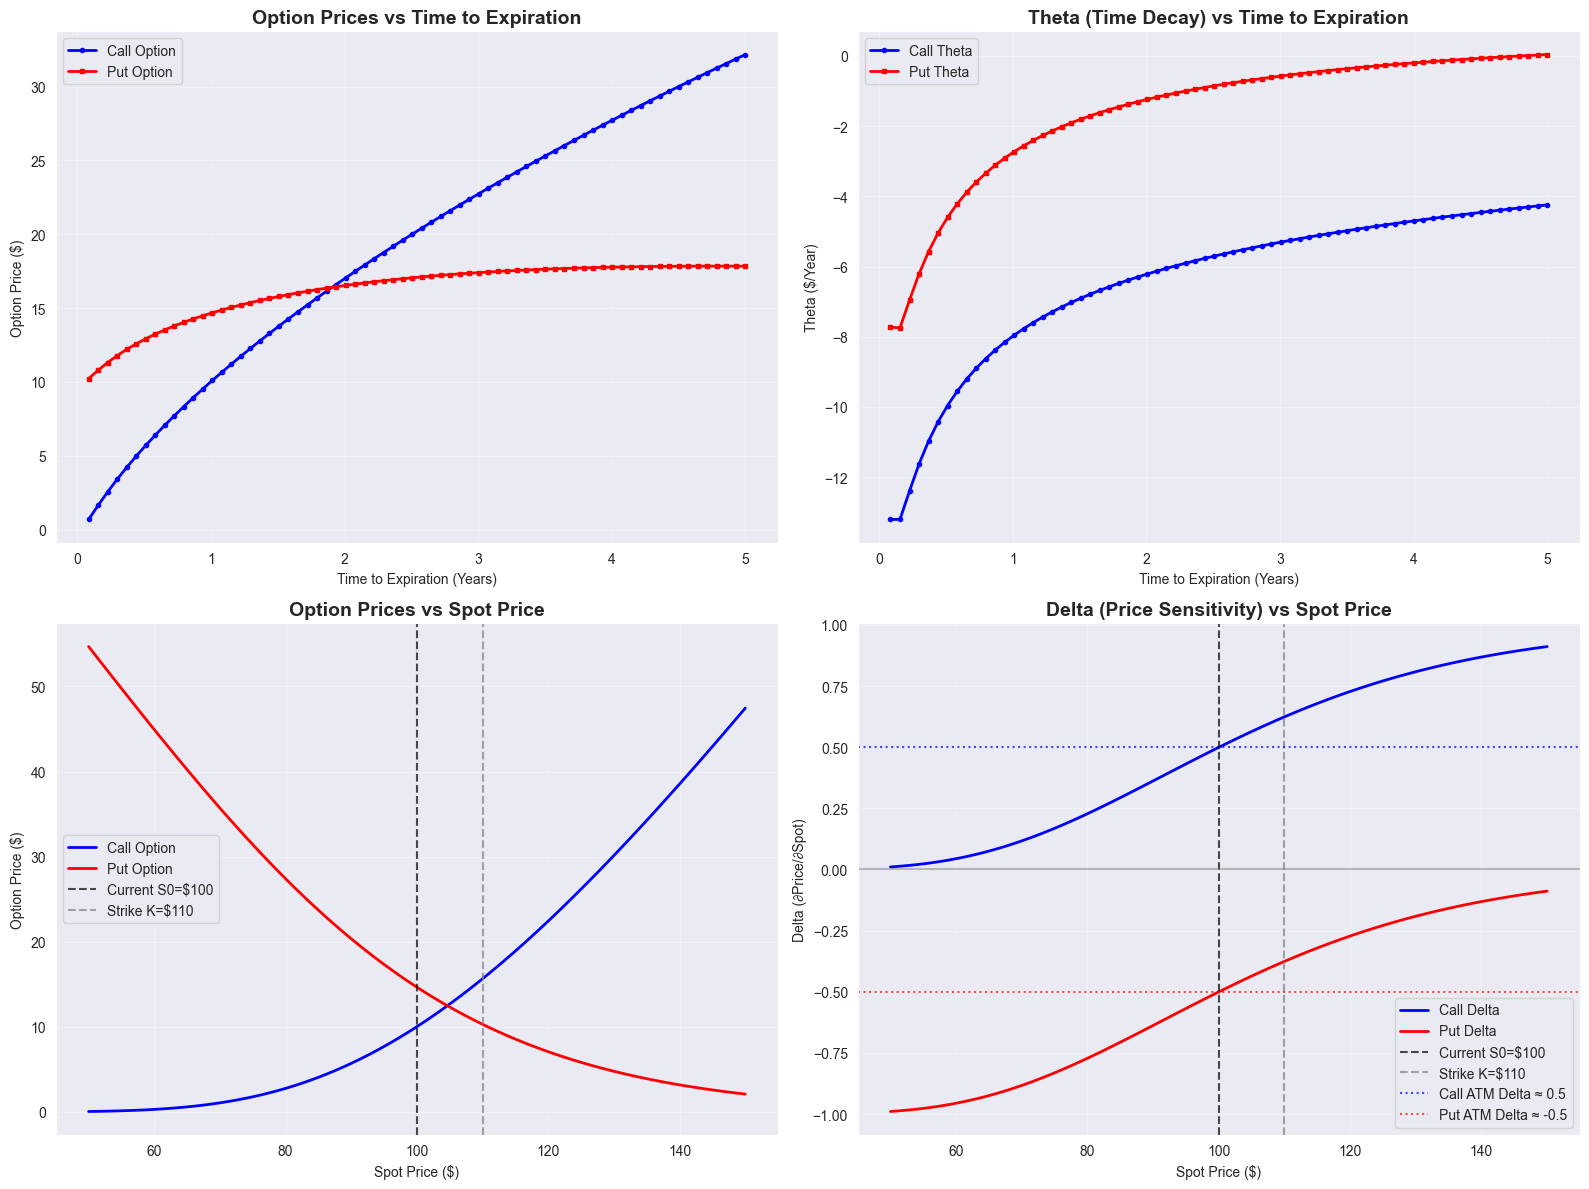

QUANTITATIVE SUMMARY
Current Market Conditions:
  • Spot Price (S0): $100
  • Strike Price (K): $110
  • Volatility (σ): 30.0%
  • Risk-free Rate (r): 5.0%
  • Moneyness: 0.909 (OTM)

Option Sensitivities at Current Market:
  Call Option:
    • Price: $10.020
    • Delta: 0.500
    • Theta: $-7.981/year
  Put Option:
    • Price: $14.655
    • Delta: -0.500
    • Theta: $-2.749/year


In [8]:
# ================================================================
# COMPREHENSIVE COMPARISON: CALLS vs PUTS GREEKS ANALYSIS
# ================================================================

print("\n🔬 ADVANCED GREEKS ANALYSIS")
print("=" * 80)

# Calculate actual Theta values using the analytical formulas
call_thetas = [bs_call_theta(S0, K, sigma, t, r) for t in times]
put_thetas = [bs_put_theta(S0, K, sigma, t, r) for t in times]

# Create comprehensive comparison visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Price Comparison over Time
ax1.plot(times, call_prices, 'b-', linewidth=2, label='Call Option', marker='o', markersize=3)
ax1.plot(times, put_prices, 'r-', linewidth=2, label='Put Option', marker='s', markersize=3)
ax1.set_title('Option Prices vs Time to Expiration', fontsize=14, fontweight='bold')
ax1.set_xlabel('Time to Expiration (Years)')
ax1.set_ylabel('Option Price ($)')
ax1.grid(True, alpha=0.3)
ax1.legend()

# 2. Theta Comparison over Time
ax2.plot(times, call_thetas, 'b-', linewidth=2, label='Call Theta', marker='o', markersize=3)
ax2.plot(times, put_thetas, 'r-', linewidth=2, label='Put Theta', marker='s', markersize=3)
ax2.set_title('Theta (Time Decay) vs Time to Expiration', fontsize=14, fontweight='bold')
ax2.set_xlabel('Time to Expiration (Years)')
ax2.set_ylabel('Theta ($/Year)')
ax2.grid(True, alpha=0.3)
ax2.legend()

# 3. Price Comparison vs Spot Price
ax3.plot(spot_prices, call_prices_vs_spot, 'b-', linewidth=2, label='Call Option')
ax3.plot(spot_prices, put_prices_vs_spot, 'r-', linewidth=2, label='Put Option')
ax3.axvline(x=S0, color='black', linestyle='--', alpha=0.7, label=f'Current S0=${S0}')
ax3.axvline(x=K, color='gray', linestyle='--', alpha=0.7, label=f'Strike K=${K}')
ax3.set_title('Option Prices vs Spot Price', fontsize=14, fontweight='bold')
ax3.set_xlabel('Spot Price ($)')
ax3.set_ylabel('Option Price ($)')
ax3.grid(True, alpha=0.3)
ax3.legend()

# 4. Delta Comparison vs Spot Price
ax4.plot(spot_prices, call_deltas, 'b-', linewidth=2, label='Call Delta')
ax4.plot(spot_prices, put_deltas, 'r-', linewidth=2, label='Put Delta')
ax4.axvline(x=S0, color='black', linestyle='--', alpha=0.7, label=f'Current S0=${S0}')
ax4.axvline(x=K, color='gray', linestyle='--', alpha=0.7, label=f'Strike K=${K}')
ax4.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
ax4.axhline(y=0.5, color='blue', linestyle=':', alpha=0.7, label='Call ATM Delta ≈ 0.5')
ax4.axhline(y=-0.5, color='red', linestyle=':', alpha=0.7, label='Put ATM Delta ≈ -0.5')
ax4.set_title('Delta (Price Sensitivity) vs Spot Price', fontsize=14, fontweight='bold')
ax4.set_xlabel('Spot Price ($)')
ax4.set_ylabel('Delta (∂Price/∂Spot)')
ax4.grid(True, alpha=0.3)
ax4.legend()

plt.tight_layout()
plt.show()

# Summary statistics
print(f"QUANTITATIVE SUMMARY")
print("=" * 80)
print(f"Current Market Conditions:")
print(f"  • Spot Price (S0): ${S0}")
print(f"  • Strike Price (K): ${K}")
print(f"  • Volatility (σ): {sigma*100:.1f}%")
print(f"  • Risk-free Rate (r): {r*100:.1f}%")
print(f"  • Moneyness: {S0/K:.3f} {'(OTM)' if S0 < K else '(ITM)' if S0 > K else '(ATM)'}")

print(f"\nOption Sensitivities at Current Market:")
print(f"  Call Option:")
print(f"    • Price: ${bs_call(S0, K, sigma, fixed_time, r):.3f}")
print(f"    • Delta: {bs_call_delta(S0, K, sigma, fixed_time, r):.3f}")
print(f"    • Theta: ${bs_call_theta(S0, K, sigma, fixed_time, r):.3f}/year")
print(f"  Put Option:")
print(f"    • Price: ${bs_put(S0, K, sigma, fixed_time, r):.3f}")
print(f"    • Delta: {bs_put_delta(S0, K, sigma, fixed_time, r):.3f}")
print(f"    • Theta: ${bs_put_theta(S0, K, sigma, fixed_time, r):.3f}/year")

print("=" * 80)